In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vae import *
%matplotlib inline

In [2]:
#Loading both sets
FireEvac_train_set = np.load('FireEvac_train_set.npy')
FireEvac_test_set = np.load('FireEvac_test_set.npy')

In [3]:
#Shape of the training and test set
print(FireEvac_train_set.shape)
print(FireEvac_test_set.shape)

(3000, 2)
(600, 2)


In [4]:
print(FireEvac_train_set)

[[ 86.6926273   62.44229187]
 [ 75.54568175  78.16017028]
 [123.44951903  85.43761181]
 ...
 [ 52.83179754  47.58244578]
 [  6.72376937  49.55944998]
 [ 34.11260284  43.68753151]]


In [5]:
plt.scatter(FireEvac_train_set[:,0], FireEvac_train_set[:,1])
plt.title('Scatter plot for training set')
plt.xlabel('x value')
plt.ylabel('y value')

Text(0, 0.5, 'y value')

Text(0, 0.5, 'y value')

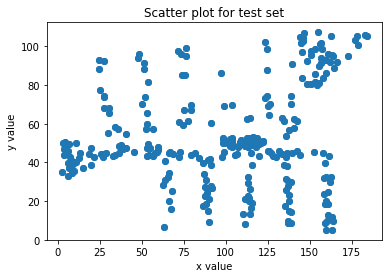

In [6]:
plt.scatter(FireEvac_test_set[:,0], FireEvac_test_set[:,1])
plt.title('Scatter plot for test set')
plt.xlabel('x value')
plt.ylabel('y value')

In [7]:
# self impl. function for returning a batch of the training data.
def our_next_batch(num, data):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]

    return np.asarray(data_shuffle)

In [8]:
#Testing purpose.
first_batch = our_next_batch(100,FireEvac_train_set)

In [9]:
# Training the model. Input: Model, Trainin-dataset, learning rate, batch size, number of epochs
# dimension of the latent space, output for the loss, number of training samples, number of neurons in the encoder layers
# number of neruons in the decoder layers
def trainer_edited(model_class, data, learning_rate=1e-7, 
            batch_size=128, num_epoch=1, n_z=2, input_dim=784, log_step=5, num_sample=55000, n_neurons_enc=256, n_neurons_dec=256 ):
    # Create a model    
    model = model_class(
        learning_rate=learning_rate, batch_size=batch_size, n_z=n_z, input_dim=input_dim, n_neurons_enc=n_neurons_enc, n_neurons_dec=n_neurons_dec)
    array = np.zeros((2,num_epoch))

    # Training loop    
    for epoch in range(num_epoch):
        start_time = time.time()
        array[0,epoch] = epoch
        # Run an epoch
        for iter in range(num_sample // batch_size):
            # Get a batch
            #our changes should be here
            batch = our_next_batch(100,data)
            #shape = batch.shape
            #batch = tf.data.Dataset.from_tensor_slices(batch).batch(100)
            #batch = data.train.next_batch(batch_size)
            # Execute the forward and backward pass 
            # Report computed loss
            losses = model.run_single_step(batch)
        end_time = time.time()
        #print(losses)
        array[1,epoch] = losses['total_loss']
        # Log the loss
        if epoch % log_step == 0 or epoch == 1:
            log_str = '[Epoch {}] '.format(epoch)
            for k, v in losses.items():
                log_str += '{}: {:.3f}  '.format(k, v)
            log_str += '({:.3f} sec/epoch)'.format(end_time - start_time)
            print(log_str)       
           
    print('Done!')
    return model, array

In [10]:
model_evac_2d_10, plot_array = trainer_edited(VariationalAutoencoder, data=FireEvac_train_set, n_z=2, num_epoch=150, input_dim = 2, batch_size = 50, n_neurons_enc=128, n_neurons_dec=128, num_sample = 3000)



Instructions for updating:
Please use `layer.__call__` method instead.





[Epoch 0] recon_loss: 463.997  latent_loss: 163.652  total_loss: 627.648  (0.184 sec/epoch)
[Epoch 1] recon_loss: 470.078  latent_loss: 166.305  total_loss: 636.384  (0.149 sec/epoch)
[Epoch 5] recon_loss: 449.286  latent_loss: 158.587  total_loss: 607.873  (0.162 sec/epoch)
[Epoch 10] recon_loss: 430.653  latent_loss: 152.022  total_loss: 582.675  (0.159 sec/epoch)
[Epoch 15] recon_loss: 400.652  latent_loss: 142.853  total_loss: 543.505  (0.162 sec/epoch)
[Epoch 20] recon_loss: 394.834  latent_loss: 139.371  total_loss: 534.204  (0.157 sec/epoch)
[Epoch 25] recon_loss: 429.260  latent_loss: 152.050  total_loss: 581.310  (0.161 sec/epoch)
[Epoch 30] recon_loss: 389.544  latent_loss: 137.655  total_loss: 527.200  (0.163 sec/epoch)
[Epoch 35] recon_loss: 397.833  latent_loss: 139.195  total_loss: 537.028  (0.170 sec/epoch)
[Epoch 40] recon_loss: 397.367  latent_loss: 141.853  total_loss: 539.220  (0.166 sec/ep

In [11]:
#plot of the reconstruction. Input: Model, Dataset
def test_reconstruction_task4(model, data):
    batch = data
    x_reconstructed = model.reconstructor(batch)
    
    x, y = x_reconstructed.T
    plt.plot(x, y, 'o', color='black');

In [16]:
#plot of the generation. Input: Model, distrbution, number of samples
def test_generation_edit1(model, z=None, batch_size=1000):
    # Test the trained model: generation
    # Sample noise vectors from N(0, 1)
    if z is None:
        z = np.random.normal(size=[batch_size, model.n_z])
    x_generated = model.generator(z)

    x_generated = x_generated.T
    x_generated[0] = x_generated[0]*175
    x_generated[1] = x_generated[1]*100
    x_generated = x_generated.T
        
    #print(x_generated)
    plt.scatter(x_generated[:,0], x_generated[:,1])
    plt.xlabel('x value')
    plt.ylabel('y value')
    plt.show()
    
    return x_generated[:100,:]
    

75.89415003622808


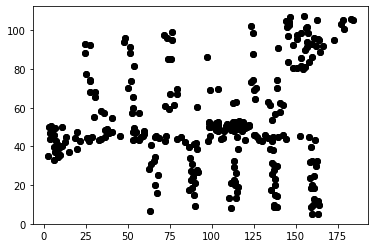

In [17]:
x,y = FireEvac_test_set.T
print(np.mean(FireEvac_test_set))
plt.plot(x, y, 'o', color='black')

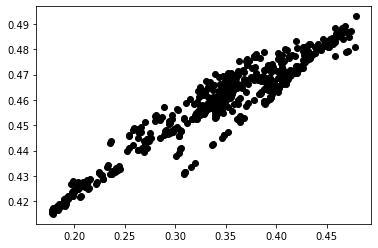

In [18]:
test_reconstruction_task4(model_evac_2d_10, FireEvac_test_set)

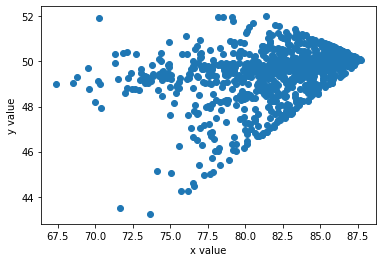

(100, 2)


In [19]:
px = test_generation_edit1(model_evac_2d_10)
print(px.shape)